# Le titanic : aurait-on pu prévoir à l'avance qui allait survivre ?
---

## But du notebook

Dans ce Notebook, nous allons faire l'étude du tristement célèbre jeu de données [des passagers du titanic](https://www.kaggle.com/c/titanic).

A partir d'un descriptif des passagers au moment où ils sont montés à bord, est-il possible de prédire qui allait s'en sortir ?

---

## Information

Le but de ce Notebook est d'étudier les données. On va utiliser pour cela quelques bibliothèques : pandas pour les manipulations de données, numpy pour les opérations mathématiques et plotly pour faire nos graphes. Des bibliothèques alternatives existent pour la visualisation de données (matplotlib, seaborn, bokeh...). numpy et pandas sont par contre des standards dans l'industrie.

Pour la Data Science, le standard de l'industrie est scikit-learn (tensorflow ou pytorch pour le deep learning). Nous les utiliserons dès les prochains cours.

---

## Données 

Utilisez les données qui sont dans le github. Si jamais vous n'y arrivez pas, vous pouvez récupérer les données en cliquant sur [ce lien](https://www.kaggle.com/c/titanic).

**Descriptif des données :**

|Variable | Definition |	Key |
|---|---|---|
|survival |	Survival |	0 = No, 1 = Yes |
|pclass 	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex |	Sex 	| |
|Age |	Age in years | | 	
|sibsp |	# of siblings / spouses aboard the Titanic | 	|
|parch |	# of parents / children aboard the Titanic 	| |
|ticket |	Ticket number 	| |
|fare |	Passenger fare 	| |
|cabin |	Cabin number 	| |
|embarked | 	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Récupération de bibliothèques importantes

In [1]:
# Les bibliothèques ci-dessous sont conseillées. Vous pouvez en utilisez d'autres si vous préférez.
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Etape 1 : Etude de la qualité des données
---

Chargez le jeu de données d'entraînement dans votre notebook avec la bibliothèque pandas.

Commençons par récupérer les données et à étudier leur qualité.

### Analyse de la qualité

1) Chargez les données du fichier "titanic_custom.csv" dans votre espace de travail. Quel est le nombre de lignes de notre dataset ?
1) Trouvez le nombre de valeurs nulles (None, np.NaN ou autres) pour chacune des colonnes.
2) Quelle est le type de chacune des colonnes ?
3) Combien y a-t-il des doublons dans la table. Identifiez-les. Qu'est-ce qu'on en fait ?
3) Pour chacune des colonnes numériques, calculez la moyenne, la médiane, le min et le max. Ces valeurs semblent-elles logiques ? Enquêtez.
3) Pour les colonnes qui sont des strings, lesquelles semblent catégoriques et lesquelles vous semblent de format libre ?
5) Combien de personnes ont survécu sur le Titanic dans la vraie vie et combien ont survécu dans notre Dataset ? Est-ce que notre Dataset est représentatif ?
6) Débarassez-vous des points de données gênants et enregistrez le nouveau dataframe sous le nom "titanic_clean.csv"

In [2]:
# Question 1

titanic_train = pd.read_csv("titanic/titanic_custom.csv")
print(f'Le nombre de lignes de notre jeu de données est {len(titanic_train)}.')

Le nombre de lignes de notre jeu de données est 893.


In [3]:
# Commande utile :
# Permet de voir les 5 premières lignes de notre dataset. Existe aussi titanic_train.tail()
# On remarque qu'il existe quelques lignes avec des valeurs NaN. Voila qui est embêtant. Combien de valeurs nulles possédons-nous ?
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Question 2 et 3
# Permet en une ligne de trouver les informations pertinentes.
# ATTENTIOn : dans le cas de datasets trop importants, lancer la commande peut devenir périlleux.
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  893 non-null    int64  
 1   Survived     893 non-null    int64  
 2   Pclass       893 non-null    int64  
 3   Name         893 non-null    object 
 4   Sex          893 non-null    object 
 5   Age          716 non-null    float64
 6   SibSp        893 non-null    int64  
 7   Parch        893 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         893 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


In [5]:
# Question 4
print(f'Il y a {titanic_train.duplicated().sum()} doublons dans le dataframe.')

Il y a 1 doublons dans le dataframe.


In [6]:
print("Notre doublon est :")
titanic_train.loc[titanic_train.duplicated()]
titanic_train_without_duplicates = titanic_train.drop_duplicates()
print(f"Sans nos valeurs en double, il nous reste {len(titanic_train_without_duplicates)} lignes.")

Notre doublon est :
Sans nos valeurs en double, il nous reste 892 lignes.


In [7]:
# Question 5
# On constate une valeur aberrante au niveau de l'âge.
titanic_train_without_duplicates.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,892.000000,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,456.709641,0.383408,2.309417,43.457580,0.522422,0.381166,32.168105
std,410.445940,0.486489,0.835923,368.180474,1.102264,0.805706,49.677238
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,9999.000000,1.000000,3.000000,9867.000000,8.000000,6.000000,512.329200


In [8]:
# Question 6) En regardant les colonnes, on se rend compte que PClass, Survived, Sex, Cabin et Embarked semblent catégoriques.
# Le nombre de valeur unique est affiché en dessous.
titanic_train.nunique()

PassengerId    892
Survived         2
Pclass           3
Name           892
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
# Note : dans python, quand on fait des comparaisons avec des nombres, les int sont transformés en float.
print("La personne avec un âge aberrant était : ")
titanic_train_without_duplicates.loc[titanic_train_without_duplicates["Age"] > 100]


La personne avec un âge aberrant était : 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,9999,0,3,"Lion, Mr. Clement",male,9867.0,0,0,NaN,0.0,NaN,C


In [10]:
titanic_train_without_clement = titanic_train_without_duplicates.loc[titanic_train_without_duplicates["Name"] != "Lion, Mr. Clement"]

In [54]:
#Question 7)
print(f"Dans notre dataset, nous possédons {sum(titanic_train_without_clement['Survived'])} survivants sur {len(titanic_train_without_clement)} passagers. \n"
      f"Notre pourcentage de survie est donc de {int(round(sum(titanic_train_without_clement['Survived']) / len(titanic_train_without_clement), 2)*100)} %. \n"
      f"La page wikipedia indique 710 survivants sur 2234 membres d'équipage (taux de survie de {int(round(710/2234, 2)*100)}) %.\n")


Dans notre dataset, nous possédons 342 survivants sur 891 passagers. 
Notre pourcentage de survie est donc de 38 %. 
La page wikipedia indique 710 survivants sur 2234 membres d'équipage (taux de survie de 32) %.



Même si le taux de survie est proche. Ceci n'est pas suffisant pour dire que notre jeu de données est représentatif (la "représentativité" du jeu de données dépend du probblème). Représentativité = tous les jeux de données qui vont parler de mon problème vont se comporter de la même manière que mon jeu de données à ce moment M.
Il est beaucoup plus simple de dire qu'un jeu de données n'est pas représentatif (il suffit de trouver une catégorie non représentée).

In [11]:
titanic_train_without_clement.to_csv("titanic/titanic_clean.csv", sep=",", index=False)

In [12]:
titanic_train = pd.read_csv("titanic/titanic_clean.csv")

## Qui sont les gens qui ont monté à bord du Titanic ?

J'ai entendu dire que les gens qui montaient sur le titanic étaient des vieux mecs aigris, célibataires et plein de thunasse. Essayons de vérifier cette hypothèse.

1) Déjà, identifions les gens qui ont eu des billets gratuits. Quel pourcentage du dataset cela représente-t-il ? Avez-vous une explication sur le fait qu'ils aient des billets gratuits ?
1) Combien d'hommes / femmes sont montés à bors du Titanic ? Tracez le résultat sur un graphe.
2) Combien de passagers ont des conjoints / membres de famille ? Tracez la distribution des passagers en fonction du nombre de membres dans leur famille (conjoints + membres autres)
3) Tracez deux graphes : l'un qui indique la distribution des âges des passagers et l'autre qui indique le nombre de personnes sur le titanic par groupes de 5 puis 10 ans. Mettez une ligne verticale indiquant l'âge moyen sur le graphe.
4) Trouvez le plus petit âge X tel qu'au 80 % des passagers ont moins de X ans (pour cette question, on ignorera les valeurs nulles en terme d'âge)
5) Combien de femmes mariées avons-nous sur le bâteau ?
6) Combien de nobles avons-nous sur notre bâteau ?
7) Tracez la distribution du prix du billet en séparant la classe du billet.
7) A quel arrêt est-ce que les riches ont embarqué ?
7) A partir des informations récupérées, que peut-on dire de notre hypothèse sue les vieux mecs aigris ?

In [13]:
# Question 1)
titanic_train.loc[titanic_train["Fare"] == 0.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [14]:
nb_gratuit = len(titanic_train.loc[titanic_train["Fare"] == 0.0])
print(f"Il y a {nb_gratuit} personnes qui ont eu un billet gratuit sur le titanic. Cela représente environ {round(nb_gratuit/len(titanic_train), 2) * 100} % des passagers.")
# Note : Peut-être sont-ce des membres d'équipage ? On ne sait pas plus que ça.

Il y a 15 personnes qui ont eu un billet gratuit sur le titanic. Cela représente environ 2.0 % des passagers.


In [15]:
# Question 2)
print("Réparition des passagers par genres :")
print(titanic_train.groupby("Sex").count()["PassengerId"])

#fig = px.bar(titanic_train.groupby("Sex").count()["PassengerId"].reset_index(), x = 'Sex', y = 'PassengerId', labels={'PassengerId':'Nombre de passagers'}, title = "Répartition des passagers par genres")
fig = px.histogram(titanic_train, x="Sex", title = "Répartition des passagers par genres")
fig.show()

Réparition des passagers par genres :
Sex
female    314
male      577
Name: PassengerId, dtype: int64


In [16]:
# Question 3)
titanic_train["FamilySize"] = titanic_train["SibSp"] + titanic_train["Parch"]
print(f"On observe que {len(titanic_train.loc[titanic_train['FamilySize'] > 0])} personnes sur le Titanic avaient une famille.")

#fig = px.bar(titanic_train.groupby("FamilySize").count()["PassengerId"].reset_index(), x = 'FamilySize', y = 'PassengerId', labels={'PassengerId':'Nombre de personnes concernées'}, title = "Répartition des passagers par nombre de membres dans leur famille")
fig = px.histogram(titanic_train, x="FamilySize", title = "Répartition des passagers par nombre de membres dans leur famille", marginal = "box", hover_data = titanic_train.columns)
fig.show()

On observe que 354 personnes sur le Titanic avaient une famille.


In [46]:
# Question 4) Deux solutions sont possibles.
# La première est de faire un histogramme associé à un boxplot, la deuxième est d'utiliser la fonction distplot de seaborn (celle de plotly est dépréciée).
# Afin d'avoir une vision plus précise de la répartition des points, on associe un boxplot à notre figure.

fig = px.histogram(titanic_train, x="Age", marginal="box", hover_data = titanic_train.columns, title = "Répartition des passagers par Âge")
fig.add_vline(x=titanic_train["Age"].mean(), line_width=3, line_dash="dash", line_color="red")
fig.show()

In [31]:
# Première solution. IMPORTANT : on pense bien à mettre une légende qui convient pour les groupes d'âges.
# En regardant plus en détail les figures, on se rend compte que pour les survivants, les chances de survie n'ont pas une relation simple avec l'âge
# Pas augmentation claire ou diminution claire. Peut-être qu'il vaut mieux considérer l'âge comme variable catégorique ?
def group_age(df = titanic_train, bin_size = 5):
    df = df[["Age", "Survived"]].dropna()
    df["Age_group"] = df['Age'].apply(lambda x : f"[{int(x//bin_size*bin_size)} - {int(x//bin_size*bin_size+bin_size)}[")
    return df

fig = px.histogram(group_age(titanic_train), x="Age_group", marginal="box", color="Survived", title = "Répartition des passagers par Âge (groupes de 5 ans)", category_orders=dict(Age_group=[f"[{k*5} - {(k+1)*5}[" for k in range(int(max(titanic_train["Age"]//5))+1)]))
fig.show()

fig = px.histogram(group_age(titanic_train, 10), x="Age_group", marginal="box", color="Survived", title = "Répartition des passagers par Âge (groupes de 10 ans)", category_orders=dict(Age_group=[f"[{k*10} - {(k+1)*10}[" for k in range(int(max(titanic_train["Age"]//10))+1)]))
fig.show()

In [38]:
fig = px.histogram(group_age(titanic_train, 10), x="Age_group", marginal="box", color="Survived", title = "Répartition des passagers par Âge (groupes de 10 ans avec barres séparées)", barmode="group", category_orders=dict(Age_group=[f"[{k*10} - {(k+1)*10}[" for k in range(int(max(titanic_train["Age"]//10))+1)]))
fig.show()

In [121]:
# Question 5) La valeur demandée correspond au huitième décile.
print(f"Le huitième décile pour l'âge est {titanic_train['Age'].quantile(0.8)}")

Le huitième décile pour l'âge est 41.0


In [122]:
# Question 6) Une manière "astucieuse" serait de regarder combien de Mrs on a. Malheureusement, dans les cas où la personne possède un titre de noblesse, on n'utilise pas Mrs.
titanic_train["Name"].apply(lambda x : "Mrs." in str(x)).sum()

125

In [123]:
# On pourrait penser à regarder l'intersection des femmes et des personnes avec conjoint et frère mais on possède des Miss. Raté.
titanic_train.loc[(titanic_train["Sex"] == "female") & (titanic_train["SibSp"] > 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,1
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,2
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1


In [126]:
# On constate que le titre d'une personne est indiqué : Nom, titre. Prénom. On va essayer de le récupérer
titanic_train["Title"] = titanic_train["Name"].apply(lambda x : x.split(", ")[1].split(". ")[0])

In [133]:
titanic_train["male"] = titanic_train["Sex"] == "male"
titanic_train["female"] = titanic_train["Sex"] == "female"
print(f"En comptant les différentes catégories, il y a entre {sum(titanic_train['Title'] == 'Mrs')} et {sum((titanic_train['Title'].isin(['Mrs', 'Dr', 'Lady', 'Mme', 'the Countess'])) & titanic_train['female'])} femmes mariées à bord du titanic.")

En comptant les différentes catégories, il y a entre 125 et 129 femmes mariées à bord du titanic.


In [135]:
# On étudie les titres en fonction du genre.
# Il serait utile de simplifier cette rubrique afin de voir si les personnes avec des noms "fancy" ont plus de chances de survie.

titanic_train.groupby(["Title"]).sum()[["male", "female"]]

,male,female
Title,,
Capt,1,0
Col,2,0
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0
Miss,0,182


In [137]:
# Question 7) Même chose que précédemment en étudiant les titres.
print(f"En comptant les différentes catégories, il y a possiblement {sum((titanic_train['Title'].isin(['Col', 'Don', 'Lady', 'Jonkheer', 'the Countess', 'Major', 'Master', 'Sir'])))} nobles à bord du titanic.")

En comptant les différentes catégories, il y a possiblement 49 nobles à bord du titanic.


In [48]:
# Question 8) Prix du billet par classes
fig = px.histogram(titanic_train, x="Fare", marginal="box", color="Pclass", title = "Répartition des passagers en fonction du prix du billet (répartition par classes)")
fig.show()
# On constate que les échelles sont démesurées. On décide alors de tracer une deuxième figure qui exclue les extrêmes.

In [47]:
# Arpès avoir appliqué un logarithme, le grpahe est beaucoup plus lisible.
# Les boîtes à moustache nous permettent de constater que les prix des billets sont bien séparés par classes.
titanic_train["logFare"] = titanic_train["Fare"].apply(lambda x : np.log10(x+1))
fig = px.histogram(titanic_train, x="logFare", marginal="box", color="Pclass", title = "Répartition des passagers en fonction du prix du billet (répartition par classes, échelle logarithmique)")
fig.show()

In [50]:
# Version alternative avec chevauchement des couleurs.
titanic_train["logFare"] = titanic_train["Fare"].apply(lambda x : np.log10(x+1))
fig = px.histogram(titanic_train, x="logFare", marginal="box", color="Pclass", title = "Répartition des passagers en fonction du prix du billet (répartition par classes, échelle logarithmique)", barmode="overlay", opacity=0.75)
fig.show()

In [78]:
# Question 9) Comme définition de riche, on va prendre riche = billet de première classe.
# Bien qu'il y ait des outliers, la majorité des gens qui sont en 1ère classe ont payé leur billet plus cher que les gens de 2ème et 3ème classe.

fig = px.histogram(titanic_train.loc[titanic_train["Pclass"] == 1], x="Embarked", title = "Nombre de passagers de première classe ayant embarqué dans chaque port")
fig.show()

## Et Léo dans tout ça ?

Dans ce Notebook nous allons tenter de résoudre un mystère historique : est-ce que Leonardo Di Caprio aurait survécu s'il avait voyagé sur le Titanic ?

1) Quel est le pourcentage de survie pour des hommes et des femmes ? Comment est-ce que ça s'annonce pour Léo et Rose ?
3) Etudiez la corrélation entre les variables numériques. Que peut-on dire de plus pour Léo sachant qu'il possède un billet de troisième classe qui coûtait vraiment pas cher ?
4) Etudiez le pourcentage de survie en fonction du nombre de frères et soeurs (SibSp). Cette statistiques vous parait-elle pertinente ?
4) Que peut-on dire sur la corrélation entre l'âge et le fait qu'un passsager ait survécu ou pas ? Cela vous étonne-t-il ?
5) Créez les variables FamilySize = SibSp + parch et la variable IsAlone = (FamilySize == 0). Tracez le pourcentage de survie en fonction de FamilySize. Qu'est-ce que cela augure pour Léo ?
7) Etudiez la répartition des survivants en fonction de la provenance (port d'embarquement). Mettez tous sur le même graphe.
6) A partir des différentes observations, quels paramètres vous semblent pertinents pour mesurer si quelqu'un a survécu au naufrage du titanic ?
7) Léo méritait-il de mourir ?

In [57]:
# Question 1)
titanic_train.groupby(["Sex", "Survived"]).count()["PassengerId"]

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [59]:
titanic_train_men = titanic_train.loc[titanic_train["Sex"] == "male"]
titanic_train_women = titanic_train.loc[titanic_train["Sex"] == "female"]
print(f"On constate que sur nos {len(titanic_train)} passagers, {len(titanic_train_men)} étaient des hommes et {len(titanic_train_women)} étaient des femmes.\n"
      f"Environ {int(round(sum(titanic_train_men['Survived']) * 100 / len(titanic_train_men), 2))} % des hommes ont survécu.\n"
      f"Environ {int(round(sum(titanic_train_women['Survived']) * 100 / len(titanic_train_women), 2))} % des femmes ont survécu.\n")

On constate que sur nos 891 passagers, 577 étaient des hommes et 314 étaient des femmes.
Environ 18 % des hommes ont survécu.
Environ 74 % des femmes ont survécu.



In [64]:
# Question 2) 
# Note : on ignore les valeurs à NaN (colonne Age)
titanic_train[["Survived", "SibSp", "Parch", "Age", "Fare", "Pclass", "FamilySize"]].corr()

,Survived,SibSp,Parch,Age,Fare,Pclass,FamilySize
Survived,1.000000,-0.035322,0.081629,-0.077221,0.257307,-0.338481,0.016639
SibSp,-0.035322,1.000000,0.414838,-0.308247,0.159651,0.083081,0.890712
Parch,0.081629,0.414838,1.000000,-0.189119,0.216225,0.018443,0.783111
Age,-0.077221,-0.308247,-0.189119,1.000000,0.096067,-0.369226,-0.301914
Fare,0.257307,0.159651,0.216225,0.096067,1.000000,-0.549500,0.217138
Pclass,-0.338481,0.083081,0.018443,-0.369226,-0.549500,1.000000,0.065997
FamilySize,0.016639,0.890712,0.783111,-0.301914,0.217138,0.065997,1.000000


<Axes: >

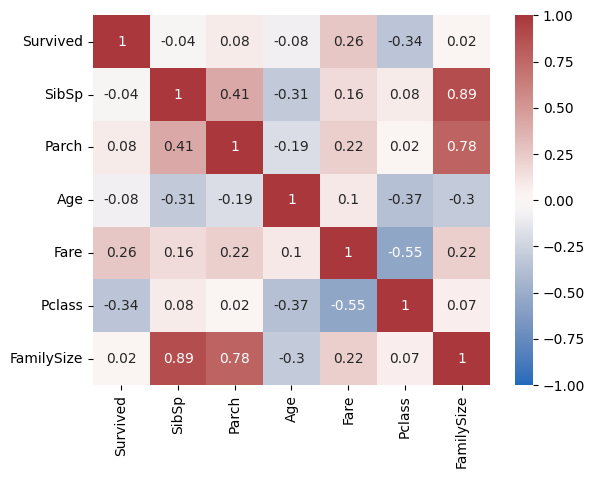

In [65]:
# Les corrélations mais en plus fancy et en plus colorées.
import seaborn as sns
matrix = titanic_train[["Survived", "SibSp", "Parch", "Age", "Fare", "Pclass", "FamilySize"]].corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

On sait que plus quelqu'un est riche, plus sa classe est petite (1ère classe = cher). Que les deux valeurs soient corrélées fortement et négativement semble logique. Les passagers en troisième classe étaient placées au fond du bâteau tandis que ceux de première classe étaient plus proches du pont (plus simple de quitter le bâteau). On constate donc une corrélation importante entre la survie et le prix du billet.

In [77]:
# Question 3)
fig = px.histogram(titanic_train, x="SibSp", title = "Nombre de survivants en fonction du nombre de frères / soeurs", color="Survived", barmode="group")
fig.show()

Question 4 (cf figures de la partie précédente). La corrélation entre l'âge et la survie est faible. Pourquoi ? Réponse : parce que les jeunes de 20 ans meurent. Dans notre cas, les gens avec moins de 20 ans et plus des 30 ans ont des meilleures chances de survie que ceux de 20 ans. On ne trouvera pas de relation linéaire entre l'âge et la survie mais une relation où certaines catégories d'âges ont mieux survécu. 

In [76]:
# Question 5)
titanic_train["IsAlone"] = titanic_train["FamilySize"] == 0
fig = px.histogram(titanic_train, x="FamilySize", title = "Nombre de survivants en fonction du nombre de membres de la famille", color="Survived", barmode="group")
fig.show()

On regardant le graphe ci-dessus et le graphe sur le nombre de frères / soeurs, on constate que :
- Les célibataires enfants uniques n'ont pas de chance.
- Les familles peu nombreuses (fort taux de survie si on possède entre 1 conjoint.e / frère / soeur et 3. Les chances de survie diminuent ensuite).

D'où peuvent provenir ces observations ? On se dit intuitivement que les familles nombreuses doivent être des familles plus pauvres, ce qui expliquerait leur faible taux de survie et les familles "moyennement nombreuses" seraient des familles plus fortunées. Afin de vérifier notre hypohèse, nous essayons de tracer la taille de la famille en fonction de la classe des billets.

In [75]:
titanic_train["IsAlone"] = titanic_train["FamilySize"] == 0
fig = px.histogram(titanic_train, x="FamilySize", title = "Nombre de passagers par classe par rapport au nombre de membres de la famille", color="Pclass", barmode="group")
fig.show()

In [74]:
# Question 6) On regarde la répartition des passagers en fonction de leur port d'embarquement. On constate que le nombre de personnes par port de départ est très deséquilibré.
# Afin de tirer une conclusion, il faudrait faire une analyse plus fine et regarder qui est monté à chaque arrêt. Ce sera pour une autre fois.

fig = px.histogram(titanic_train, x="Embarked", color ="Survived", title = "Nombre de passagers en fonction du port d'embarquement", barmode="group")
fig.show()

In [80]:
# Question 7) Faisons l'inventaire de toutes les colonnes :
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'logFare',
       'IsAlone'],
      dtype='object')

En regardant les différentes analyses réalisées, nous avons vu que : le genre de la personne, leur classe et le prix de leur billet sont des facteurs pertinents pour leur survie.

L'âge et le nombre de membres de la famille sont sans doute utilisables mais il semble plus intéressant de créer des variables plus précises (IsAlone, Age < 20, Age > 30). Nous n'avons pour l'instant pas géré les variables manquantes (on possède beaucoup d'âge manquants).